<a href="https://colab.research.google.com/github/lkidane/GAN-Implementation-in-Keras/blob/master/GAN_Implementation_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.optimizers import Adam
import numpy as np
np.random.seed(10)


In [0]:




noise_dim = 100

batch_size = 16
steps_per_epoch = 3750
epochs = 10

save_path = 'fcgan-images'

img_rows, img_cols, channels = 28, 28, 1

optimizer = Adam(0.0002, 0.5)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.datasets import mnist
import os

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

x_train = x_train.reshape(-1, img_rows*img_cols*channels)


if not os.path.isdir(save_path):
    os.mkdir(save_path)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU

In [0]:
#Generator network
def create_generator():
  generator = Sequential()
  generator.add(Dense(256,input_dim=noise_dim))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(512))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(1024))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(img_rows*img_cols*channels, activation='tanh'))

  generator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return generator

In [0]:
#Discriminator Network
def create_descriminator():
    discriminator = Sequential()
     
    discriminator.add(Dense(1024, input_dim=img_rows*img_cols*channels))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [0]:
from keras.layers import Input
from keras.models import Model

discriminator = create_descriminator()
generator = create_generator()

discriminator.trainable = False

gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [0]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_x = generator.predict(noise)

        real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        
        x = np.concatenate((real_x, fake_x))

        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9

        d_loss = discriminator.train_on_batch(x, disc_y)

        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'



Epoch: 0 	 Discriminator Loss: 0.5410749316215515 		 Generator Loss: 1.1723212003707886
Epoch: 1 	 Discriminator Loss: 0.5760684013366699 		 Generator Loss: 1.417240858078003
Epoch: 2 	 Discriminator Loss: 0.6797611713409424 		 Generator Loss: 1.6974389553070068
Epoch: 3 	 Discriminator Loss: 0.5015380382537842 		 Generator Loss: 1.6919199228286743
Epoch: 4 	 Discriminator Loss: 0.5101432800292969 		 Generator Loss: 1.6728079319000244
Epoch: 5 	 Discriminator Loss: 0.5888038277626038 		 Generator Loss: 1.5217571258544922
Epoch: 6 	 Discriminator Loss: 0.6180574893951416 		 Generator Loss: 1.4258630275726318
Epoch: 7 	 Discriminator Loss: 0.5092169046401978 		 Generator Loss: 1.8797615766525269
Epoch: 8 	 Discriminator Loss: 0.5359134674072266 		 Generator Loss: 1.936212182044983
Epoch: 9 	 Discriminator Loss: 0.5127638578414917 		 Generator Loss: 1.7145450115203857


In [0]:

import matplotlib.pyplot as plt

def show_images(noise):
    generated_images = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

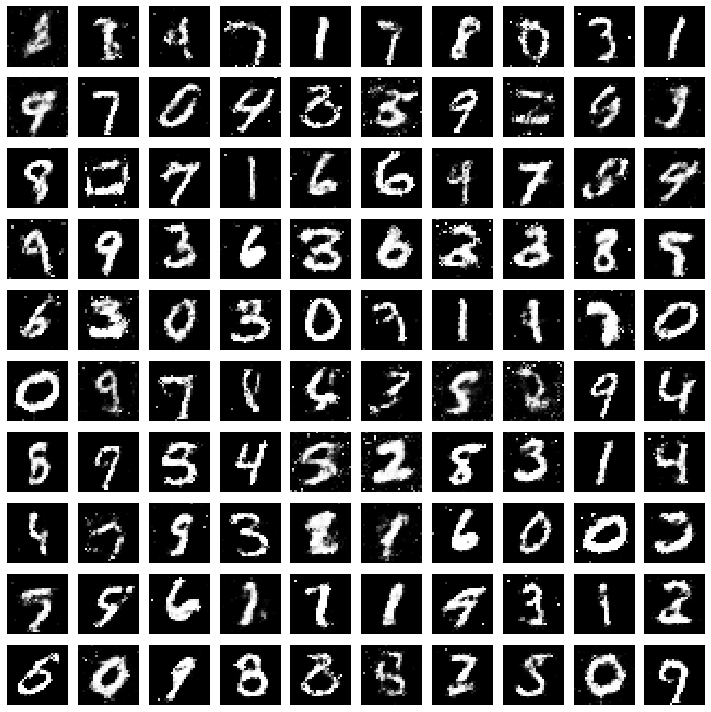

In [0]:

noise = np.random.normal(0, 1, size=(100, noise_dim))
show_images(noise)                                                              

In [0]:
#DCGAN

In [0]:
from keras.optimizers import Adam
import numpy as np

np.random.seed(10)

noise_dim = 100

batch_size = 16
steps_per_epoch = 3750
epochs = 10

save_path = 'dcgan-images'

img_rows, img_cols, channels = 32, 32, 3

optimizer = Adam(0.0002, 0.5)

In [0]:
from keras.datasets import cifar10
import os

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [0]:
from keras.datasets import mnist
import os

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

x_train = x_train.reshape((-1, img_rows,img_cols,channels))


if not os.path.isdir(save_path):
    os.mkdir(save_path)

In [0]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
#Select only cats for computational Reasons
x_train =  x_train[np.where(y_train ==2)[0]]

In [0]:
from keras.initializers import RandomNormal
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,Reshape
from keras.layers.advanced_activations import LeakyReLU


In [0]:
def create_generator():
  generator = Sequential()

  #starting size
  d=4
  #RandomNormal takes mean and standard deviation to create random numbers
  generator.add(Dense(d*d*256,kernel_initializer=RandomNormal(0,0.02), input_dim=noise_dim))
  generator.add(LeakyReLU(0.2))
  # 4*4*256
  generator.add(Reshape((d,d,256)))
  # 8*8*128
  generator.add(Conv2DTranspose(128,(4,4),strides=2,padding='same',kernel_initializer=RandomNormal(0,0.02)))
  generator.add(LeakyReLU(0.2))

  generator.add(Conv2DTranspose(128,(4,4),strides=2,padding='same',kernel_initializer=RandomNormal(0,0.02)))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Conv2DTranspose(128,(4,4),strides=2,padding='same',kernel_initializer=RandomNormal(0,0.02)))
  generator.add(LeakyReLU(0.2))
  
  #32*32*3
  generator.add(Conv2D(channels,(3,3), padding='same', activation= 'tanh', kernel_initializer=RandomNormal(0,0.2)))
  generator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return generator




In [0]:
#Create Descriminator Model
#Classifier networks are always good descriminator models
from keras.layers import Dropout,Flatten
def create_descriminator():

  descriminator = Sequential()

  descriminator.add(Conv2D(64,(3,3),padding='same', kernel_initializer=RandomNormal(0,0.02), input_shape=(img_cols,img_rows,channels)))
  descriminator.add(LeakyReLU(0.2))

  descriminator.add(Conv2D(128, (3,3), kernel_initializer=RandomNormal(0,0.2), padding='same', strides=2))
  descriminator.add(LeakyReLU(0.2))

  descriminator.add(Conv2D(128, (3,3), strides=2, padding='same', kernel_initializer=RandomNormal(0,0.2)))
  descriminator.add(LeakyReLU(0.2))

  descriminator.add(Conv2D(256, (3,3), strides=2, padding='same', kernel_initializer=RandomNormal(0,0.2)))
  descriminator.add(LeakyReLU(0.2))

  descriminator.add(Flatten())
  descriminator.add(Dropout(0.4))
  descriminator.add(Dense(1, activation='sigmoid', input_shape=(img_cols, img_rows, channels)))

  descriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return descriminator




In [0]:
from keras.layers import Input
from keras.models import Model

discriminator = create_descriminator()
generator = create_generator()

discriminator.trainable = False

gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [0]:
import matplotlib.pyplot as plt

def show_images(noise, epoch=None):
    generated_images = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    
    if epoch != None:
        plt.savefig(f'{save_path}/gan-images_epoch-{epoch}.png')
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow w

Epoch: 0 	 Discriminator Loss: 0.5742692351341248 		 Generator Loss: 1.2610514163970947


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

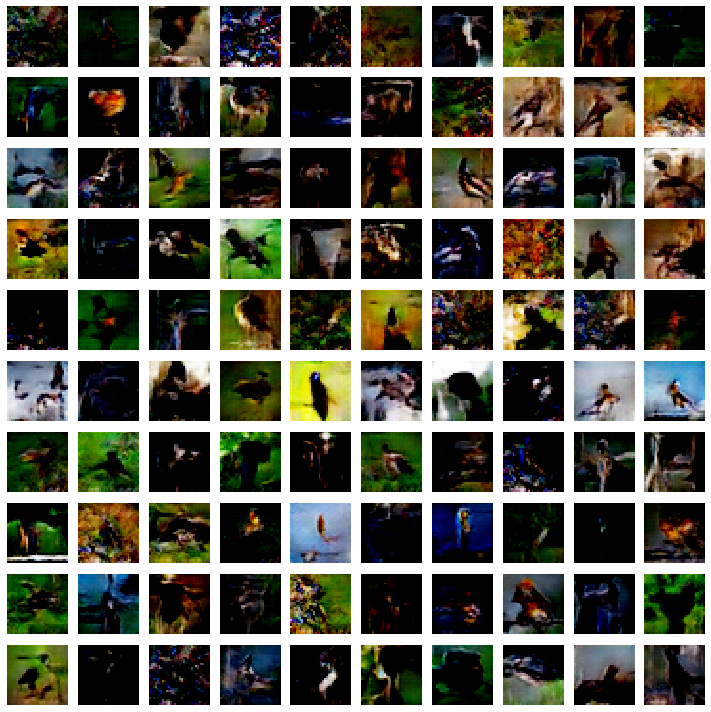

Epoch: 1 	 Discriminator Loss: 0.45413848757743835 		 Generator Loss: 1.561994194984436


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch: 2 	 Discriminator Loss: 0.46437618136405945 		 Generator Loss: 1.3044157028198242


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

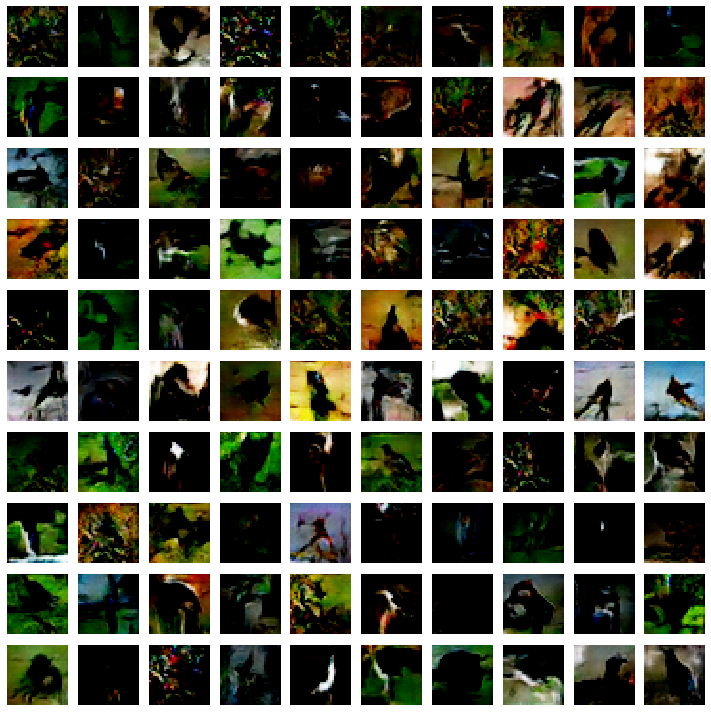

Epoch: 3 	 Discriminator Loss: 0.45244091749191284 		 Generator Loss: 1.72920823097229


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Epoch: 4 	 Discriminator Loss: 0.608773946762085 		 Generator Loss: 1.3420867919921875


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

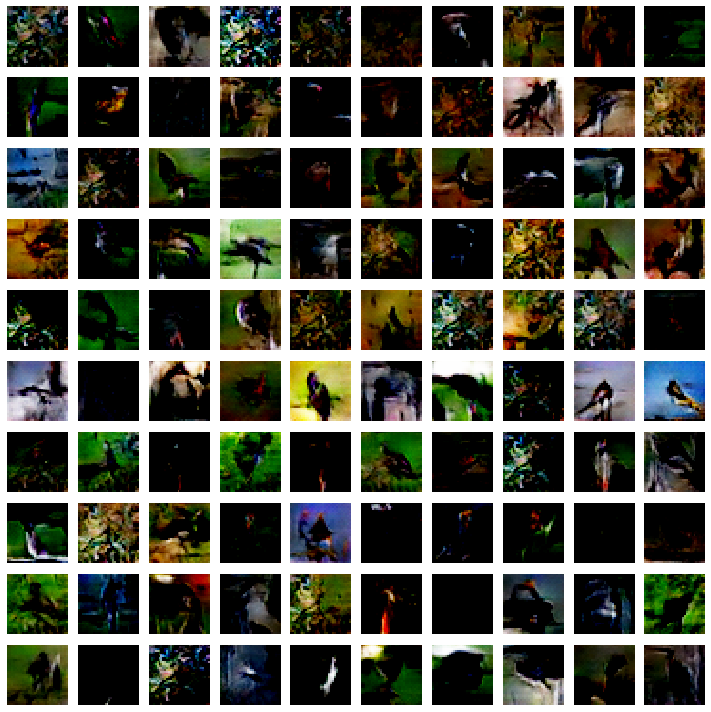

Epoch: 5 	 Discriminator Loss: 0.5402041673660278 		 Generator Loss: 1.6323742866516113


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Epoch: 6 	 Discriminator Loss: 0.4921759068965912 		 Generator Loss: 1.6497642993927002


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

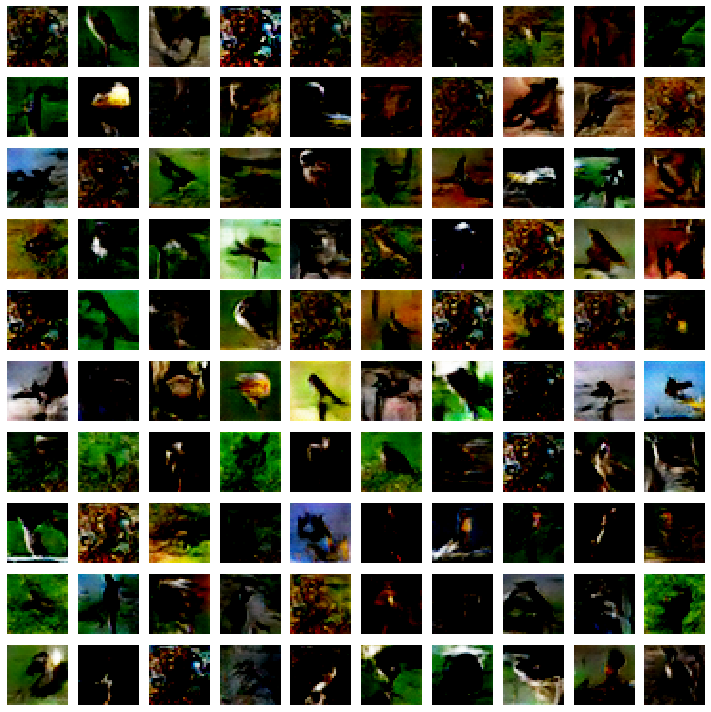

Epoch: 7 	 Discriminator Loss: 0.44448328018188477 		 Generator Loss: 1.5025944709777832


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Epoch: 8 	 Discriminator Loss: 0.3702181577682495 		 Generator Loss: 1.881253957748413


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

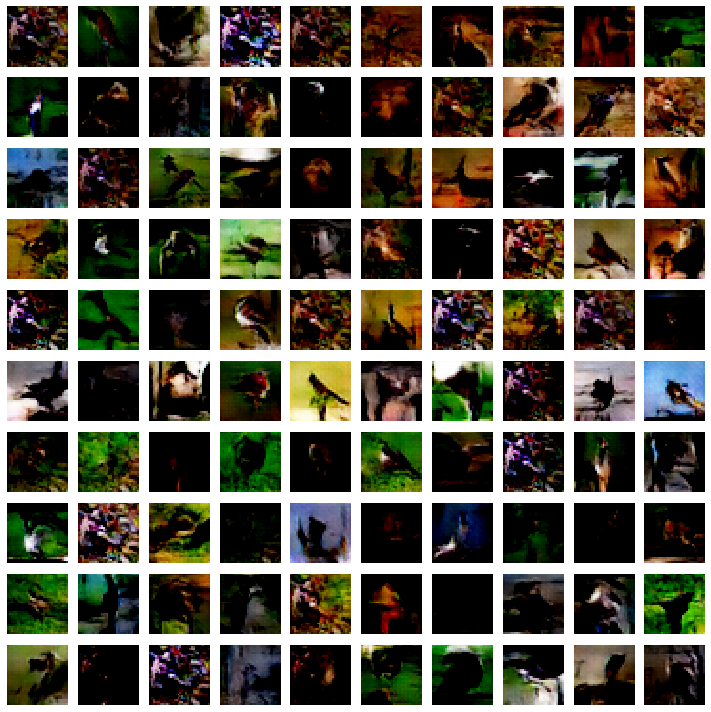

Epoch: 9 	 Discriminator Loss: 0.4958186149597168 		 Generator Loss: 2.477846384048462


In [0]:
static_noise = np.random.normal(0, 1, size=(100, noise_dim))

for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

        fake_x = generator.predict(noise)

        x = np.concatenate((real_x, fake_x))

        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9

        d_loss = discriminator.train_on_batch(x, disc_y)

        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')
    if epoch % 2 == 0:
        show_images(static_noise, epoch)

In [0]:
from PIL import Image, ImageDraw

frames = []
for image in os.listdir(save_path):
    frames.append(Image.open(save_path + '/' + image))
frames[0].save('gan_training.gif', format='GIF', append_images=frames[1:], save_all=True, duration=400, loop=0)


In [0]:
#sorted(image_names, key=lambda name: int(''.join(i for i in name if i.isdigit())))

In [0]:
image_names = os.listdir(save_path)

frames = []
for image in sorted(image_names, key= lambda name: int('' .join(i for i in name if i.isdigit()))):
  frames.append(Image.open(save_path + '/' + image))
frames[0].save('gen_training2.gif', format='GIF', append_images=frames[1:], save_all=True, duration=80, loop=0)

discriminator.save('dcdiscriminator.h5')
generator.save('dcgenerator.h5')

In [0]:
#This is extracted from the amazing blog on GAN in this link
https://medium.com/analytics-vidhya/implementing-a-gan-in-keras-d6c36bc6ab5f